In [1]:
# ! py -m pip install seaborn
# ! py -m pip install sklearn

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
# from IPython.display import display

pd.plotting.register_matplotlib_converters()

df = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Filling Age column NaNs with age mean 

In [4]:
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Filling Embarked column Nans with random values

In [5]:
df['Embarked'].isnull().sum()

2

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].sample().iloc[0])

In [7]:
df['Embarked'].isnull().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Dropping cabin column due to insuficient number of data

In [9]:
df = df.drop(['Cabin'], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Encoding Sex column (0-female, 1-male)

In [10]:
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


#### Encoding Embarked column (1- S (Southampton), 2 - C (Cherbourg), 3- Q (Queenstown))

In [11]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.000000,0,0,370376,7.75,Q


In [13]:
df['Embarked'] = np.where(df['Embarked'] == 'S', 1, (np.where(df['Embarked'] == 'C', 2, 3 )))
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.00,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.00,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.45,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.00,2
890,891,0,3,"Dooley, Mr. Patrick",1,32.000000,0,0,370376,7.75,3


#### Dropping Name column and Ticket (number) column as they seem irrelavant to constructing a model 

In [14]:
df = df.drop(['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


### Exploratory Data Analisys

#### Searching for corelations 

In [15]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

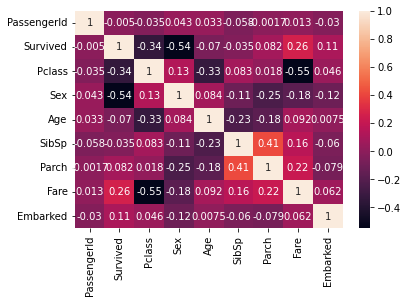

In [16]:
sns.heatmap(corr, annot=True)

In [17]:
classes = df['Pclass'].value_counts()
classes

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0, 0.5, 'Number of passangers')

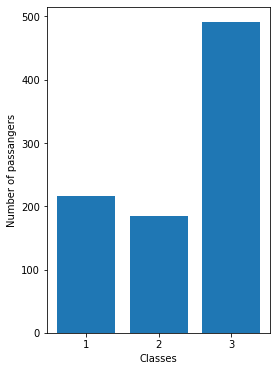

In [18]:
fig, ax  = plt.subplots(figsize=[4,6])

ax.bar(classes.index, classes, tick_label = classes.index)
plt.xlabel('Classes')
plt.ylabel('Number of passangers')

#### Counting survived passangers with division by class

##### By function:

In [19]:
def survived_by_class(df):
    
    survived_first_class = 0 
    survived_second_class = 0
    survived_third_class = 0
    
    for ind in df.index:
        if df['Survived'][ind] == 1:
            
            if df['Pclass'][ind] == 1:
                survived_first_class += 1
            
            elif df['Pclass'][ind] == 2:
                survived_second_class += 1
            
            elif df['Pclass'][ind] == 3:
                survived_third_class += 1
            
            else:
                pass
        else:
            pass
    
    return [survived_first_class, survived_second_class, survived_third_class]

In [20]:
survived_by_class= survived_by_class(df)
survived_by_class

[136, 87, 119]

##### By sum of elements:

In [21]:
survived_first_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 1), 'Survived'].sum() 
survived_second_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 2), 'Survived'].sum()
survived_third_class = df.loc[(df['Survived'] == 1) & (df['Pclass'] == 3), 'Survived'].sum()
survived_by_class_list = [survived_first_class, survived_second_class, survived_third_class]
survived_by_class_list

[136, 87, 119]

#### Survival rate by class

In [22]:
rate_1 = (survived_by_class_list[0])/(df['Pclass'].value_counts()[1])
rate_2 = (survived_by_class_list[1])/(df['Pclass'].value_counts()[2])
rate_3 = (survived_by_class_list[2])/(df['Pclass'].value_counts()[3])
surv_rates_class = [rate_1, rate_2, rate_3]
surv_rates_class

[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]

Text(0.5, 1.0, 'Survival rate by classes')

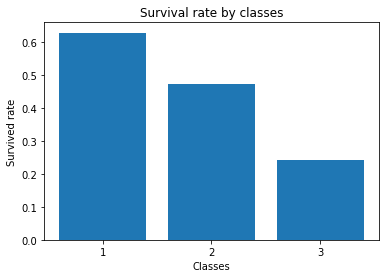

In [23]:
classes = df['Pclass'].value_counts()

fig, ax = plt.subplots()
ax.bar(classes.index.sort_values(), surv_rates_class, tick_label = classes.index.sort_values())

plt.xlabel("Classes")
plt.ylabel("Survived rate")
plt.title("Survival rate by classes")

#### Survival by sex

In [24]:
#  0-female, 1-male

df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [25]:
males = df['Sex'].value_counts()[1]
males

577

In [26]:
females = df['Sex'].value_counts()[0]
females

314

In [27]:
survived_females = df.loc[(df['Survived'] == 1) & (df['Sex'] == 0), 'Survived'].sum() 
survived_males = df.loc[(df['Survived'] == 1) & (df['Sex'] == 1), 'Survived'].sum() 
survived_females, survived_males

(233, 109)

In [28]:
male_survival_rate = survived_males/males
female_survival_rate = survived_females/females

female_survival_rate, male_survival_rate

(0.7420382165605095, 0.18890814558058924)

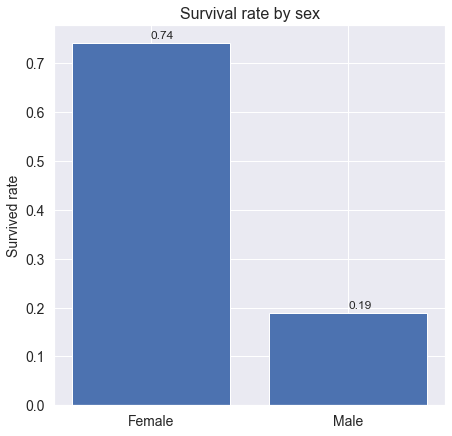

In [110]:
from matplotlib.ticker import FormatStrFormatter

sexes = df['Sex'].value_counts()

survival_rates = [female_survival_rate, male_survival_rate]

fig, ax = plt.subplots()
ax.bar(sexes.index.sort_values(), survival_rates, tick_label = ['Female', 'Male']) #tick_label = sexes.index.sort_values()

# plt.xlabel("Sex")
plt.ylabel("Survived rate", fontsize=14)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title("Survival rate by sex", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for index, value in enumerate(survival_rates):
    ax.text(index, value+0.01, str(round(value,2)))

plt.show()

## Training a model 

#### Prepearing training and testing sets

In [30]:
from sklearn.model_selection import train_test_split

y = df.pop('Survived')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Logistic Regression model

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [32]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#### Results on training set

In [33]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def print_confusion_matrix(y_true, y_predict,
                           set_type='train',
                           cmap = None,
                           figsize=(7,7), 
                           label_font_size=14,
                           title_font_size=16
                          ):

    sns.set(rc ={'figure.figsize':figsize})
    cm = confusion_matrix(y_true, y_predict)

    ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)

    plt.xlabel('Prediction', fontsize=label_font_size)
    plt.ylabel('Truth', fontsize=label_font_size)
    plt.title('Confusion matrix- train set (Logistic Regression)', fontsize=title_font_size)
    plt.show()

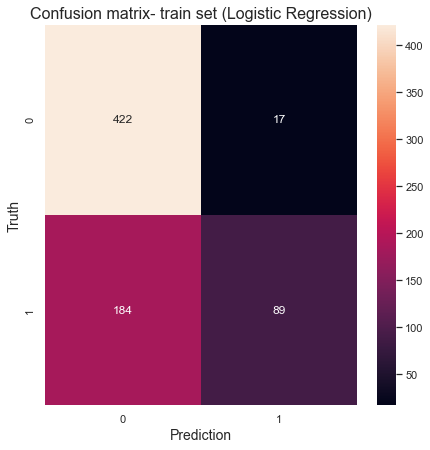

In [34]:
print_confusion_matrix(y_train, y_pred_train)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(true, prediction, average='macro'):
    accuracy = accuracy_score(true, prediction)
    precision = precision_score(true, prediction)
    recall = recall_score(true, prediction, average=average, zero_division=0)
    f1 = f1_score(true, prediction, average=average, zero_division=0)
    mislabeled = (true != prediction).sum()
    total = len(true)
    results = {'Accuracy':accuracy, 'Precision':precision, 'Recall': recall,
               'F1':f1, 'Mislabeled':mislabeled, 'Total':total}
    return  results

def print_metrics(metrics, classifier_id='classifier', data_type='training'):
    print(f'Results for {classifier_id} with {data_type} set, are....\n')
    for key in metrics:
        print(f'{key} : {metrics[key]}')

In [36]:
print_metrics(calculate_metrics(y_train, y_pred_train), data_type='training', classifier_id='Logistic Regression')

Results for Logistic Regression with training set, are....

Accuracy : 0.7176966292134831
Precision : 0.839622641509434
Recall : 0.6436414762155082
F1 : 0.6386562472383885
Mislabeled : 201
Total : 712


#### Results on test set

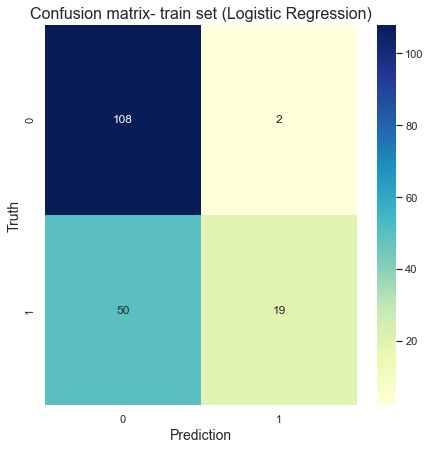

In [37]:
print_confusion_matrix(y_test, y_pred_test, cmap="YlGnBu")

In [116]:
LR_results = calculate_metrics(y_test, y_pred_test)

print_metrics(LR_results,data_type='test', classifier_id='Logistic Regression')

LR_results

Results for Logistic Regression with test set, are....

Accuracy : 0.7821229050279329
Precision : 0.7586206896551724
Recall : 0.7552042160737813
F1 : 0.7620411084978014
Mislabeled : 39
Total : 179


{'Accuracy': 0.7821229050279329,
 'Precision': 0.7586206896551724,
 'Recall': 0.7552042160737813,
 'F1': 0.7620411084978014,
 'Mislabeled': 39,
 'Total': 179}

In [120]:
# TODO: Save results from all models so it can be compared

results_frame = pd.DataFrame(LR_results)

# def save_results(results, model_name, extra_info):
    
#     results.append(model_name)
#     results.append(extra_info)
    
#     return results

# all_model_results = {}

# all_model_results = all_model_results.append(save_results(LR_results,'Logistic Regression'))

results_frame

ValueError: If using all scalar values, you must pass an index

#### Tuning the hyperparameters of the model

In [39]:
from sklearn.model_selection import GridSearchCV

C_values = [10.0**x for x in np.arange(-5, 1, 0.5)]
lr = LogisticRegression(penalty="l2", solver='liblinear')


searcher = GridSearchCV(estimator=lr, param_grid={'C': C_values}, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1e-05, 3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795]})

In [40]:
best_C = searcher.best_params_['C']
searcher.best_params_

{'C': 1.0}

In [41]:
lr = LogisticRegression(penalty="l2", C=best_C, solver='liblinear')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

#### Results on training set- after tuning

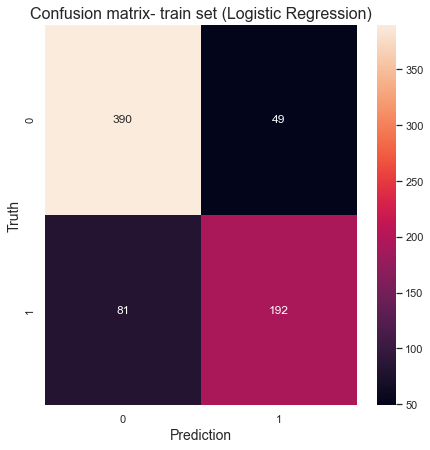

In [42]:
print_confusion_matrix(y_train, y_pred_train, set_type='train')

In [43]:
print_metrics(calculate_metrics(y_train, y_pred_train),data_type='train', classifier_id='Logistic Regression')

Results for Logistic Regression with train set, are....

Accuracy : 0.8174157303370787
Precision : 0.7966804979253111
Recall : 0.7958396956119052
F1 : 0.802112284602557
Mislabeled : 130
Total : 712


#### Results on test set- after tuning

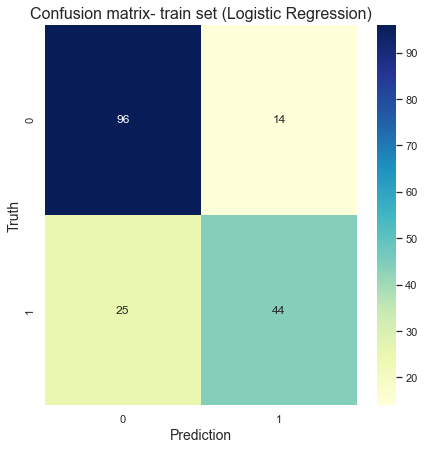

In [44]:
print_confusion_matrix(y_test, y_pred_test, set_type='test', cmap="YlGnBu")

In [45]:
print_metrics(calculate_metrics(y_test, y_pred_test),data_type='test', classifier_id='Logistic Regression')

Results for Logistic Regression with test set, are....

Accuracy : 0.7821229050279329
Precision : 0.7586206896551724
Recall : 0.7552042160737813
F1 : 0.7620411084978014
Mislabeled : 39
Total : 179


In [46]:
# print_results(calculate_metrics(y_train, y_pred_train, average='weighted'), classifier_id="LR C=0.001 TRAIN SET")
# print_results(calculate_metrics(y_test, y_pred, average='weighted'), classifier_id="LR C=0.001 TEST SET")

### Support Vector Machine (SVM) model

In [47]:
from sklearn import svm

svm_model = svm.SVC()

svm_model.fit(X_train, y_train)

SVC()

In [48]:
svm_y_train_pred = svm_model.predict(X_train)
svm_y_test_pred = svm_model.predict(X_test)

#### Results on train set

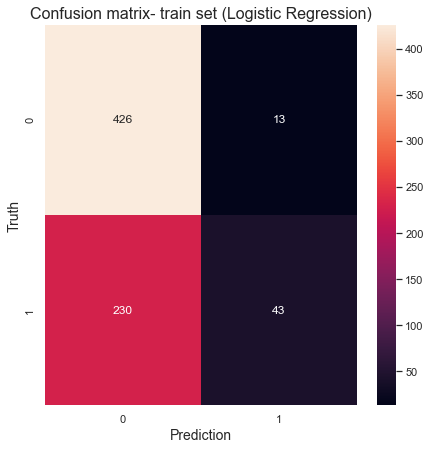

In [49]:
print_confusion_matrix(y_train, svm_y_train_pred, set_type='train') # , cmap="YlGnBu"

In [50]:
print_metrics(calculate_metrics(y_train, svm_y_train_pred),data_type='train', classifier_id='Support Vector Machine')

Results for Support Vector Machine with train set, are....

Accuracy : 0.6587078651685393
Precision : 0.7678571428571429
Recall : 0.5639482006224603
F1 : 0.5197401840363076
Mislabeled : 243
Total : 712


#### Results on test set

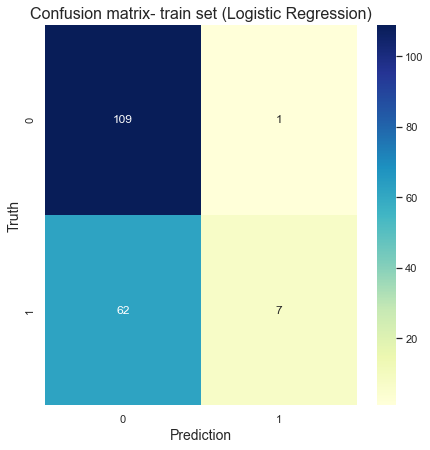

In [51]:
print_confusion_matrix(y_test, svm_y_test_pred, set_type='test', cmap="YlGnBu")

In [52]:
print_metrics(calculate_metrics(y_test, svm_y_test_pred),data_type='test', classifier_id='Support Vector Machine')

Results for Support Vector Machine with test set, are....

Accuracy : 0.6480446927374302
Precision : 0.875
Recall : 0.5461791831357049
F1 : 0.47880944678097703
Mislabeled : 63
Total : 179


#### Tuning hyperparameters of the model

In [53]:
# parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]} # 'poly',
# svc_model = svm.SVC()
# grid = GridSearchCV(svc_model, parameters, refit=True, verbose=3)
# grid.fit(X_train,y_train)

In [54]:
# best_params = grid.best_params_
# best_params

In [55]:
best_params = {'C': 1, 'gamma': 1, 'kernel': 'linear'}

svm_model_tuned = svm.SVC(C= best_params['C'], 
                           gamma=best_params['gamma'],
                          kernel=best_params['kernel'])

svm_model_tuned.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [56]:
svm_pred_train_tuned = svm_model_tuned.predict(X_train)
svm_pred_test_tuned = svm_model_tuned.predict(X_test)

#### Results on train set

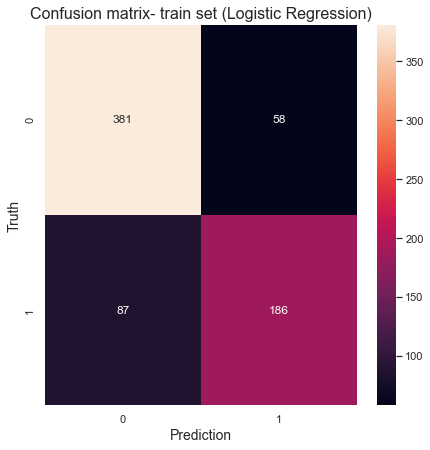

In [57]:
print_confusion_matrix(y_train, svm_pred_train_tuned, set_type='train') # , cmap="YlGnBu"

In [58]:
print_metrics(calculate_metrics(y_train, svm_pred_train_tuned),
              data_type='train', 
              classifier_id='Support Vector Machine- tuned')

Results for Support Vector Machine- tuned with train set, are....

Accuracy : 0.7963483146067416
Precision : 0.7622950819672131
Recall : 0.7746001151468123
F1 : 0.7798340438327301
Mislabeled : 145
Total : 712


#### Results on test set

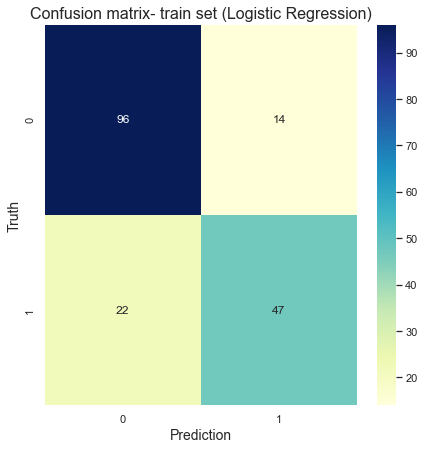

In [59]:
print_confusion_matrix(y_test, svm_pred_test_tuned, set_type='test', cmap="YlGnBu") 

In [60]:
print_metrics(calculate_metrics(y_test, svm_pred_test_tuned),
              data_type='test', 
              classifier_id='Support Vector Machine- tuned')

Results for Support Vector Machine- tuned with test set, are....

Accuracy : 0.7988826815642458
Precision : 0.7704918032786885
Recall : 0.7769433465085639
F1 : 0.7825910931174089
Mislabeled : 36
Total : 179


#### Polynomial kernel

In [61]:
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(X_train)

In [62]:
# parameters = {'kernel':['poly'], 'C':[0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]} # 'poly',
# svc_model_poly = svm.SVC()
# grid_poly = GridSearchCV(svc_model_poly, parameters, refit=True, verbose=3)
# grid_poly.fit(x_train_scaled,y_train)

In [63]:
# best_params_poly = grid_poly.best_params_
# best_params_poly

In [64]:
best_params_poly = {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

svm_model_poly = svm.SVC(C= best_params_poly['C'], 
                           gamma=best_params_poly['gamma'],
                          kernel=best_params_poly['kernel'])

svm_model_poly.fit(x_train_scaled, y_train)

SVC(C=0.1, gamma=1, kernel='poly')

In [65]:
x_test_scaled = preprocessing.scale(X_test)

In [66]:
svm_pred_train_poly = svm_model_poly.predict(x_train_scaled)
svm_pred_test_poly = svm_model_poly.predict(x_test_scaled)

#### Results on train set

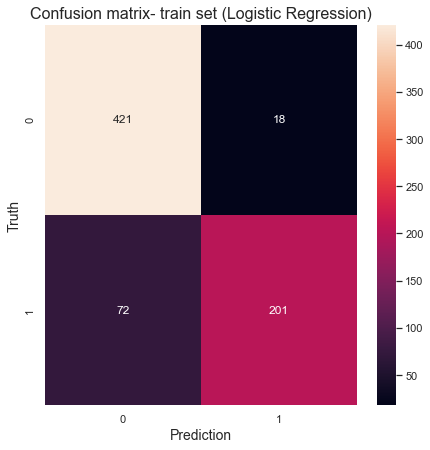

In [67]:
print_confusion_matrix(y_train, svm_pred_train_poly, set_type='train') # , cmap="YlGnBu"

In [68]:
print_metrics(calculate_metrics(y_train, svm_pred_train_poly),
              data_type='train', 
              classifier_id='Support Vector Machine- tuned (poly)')

Results for Support Vector Machine- tuned (poly) with train set, are....

Accuracy : 0.8735955056179775
Precision : 0.9178082191780822
Recall : 0.8476307291797042
F1 : 0.8602533235632785
Mislabeled : 90
Total : 712


#### Results on test set

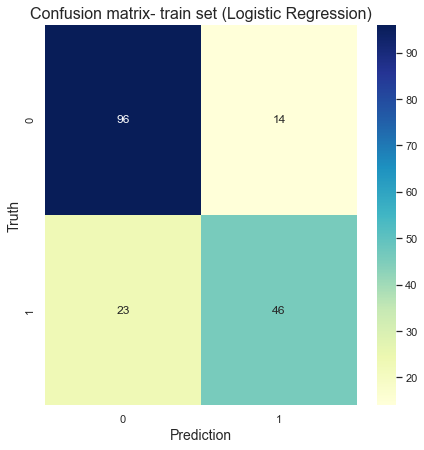

In [69]:
print_confusion_matrix(y_test, svm_pred_test_poly, set_type='train', cmap="YlGnBu")

In [70]:
print_metrics(calculate_metrics(y_test, svm_pred_test_poly),
              data_type='test', 
              classifier_id='Support Vector Machine- tuned (poly)')

Results for Support Vector Machine- tuned (poly) with test set, are....

Accuracy : 0.7932960893854749
Precision : 0.7666666666666667
Recall : 0.7696969696969697
F1 : 0.7758031210859483
Mislabeled : 37
Total : 179


### Neural Network

In [71]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input #, Dropout

network = models.Sequential()

network.add(Dense(8, activation='relu')) # input_shape ? , input_shape=(8,)
network.add(Dense(256, activation='relu'))
network.add(Dense(256, activation='relu'))
network.add(Dense(256, activation='relu'))
network.add(Dense(2, activation='sigmoid'))

X_train.shape, y_train.shape

((712, 8), (712,))

In [72]:
network.compile(
    optimizer='adam',  # "rmsprop"
    loss='sparse_categorical_crossentropy', #loss='categorical_crossentropy', binary_crossentropy
    metrics=['accuracy']
)

In [73]:
history = network.fit(X_train,
            y_train,
            epochs=10,
            batch_size=32
            )

Epoch 1/10
23/23 [==============================] - 1s 2ms/step - loss: 4.4838 - accuracy: 0.5309
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 1.6560 - accuracy: 0.5449
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.6081
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.5716
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.7837 - accuracy: 0.5997
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.7717 - accuracy: 0.6011
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6376
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.6306
Epoch 9/10
23/23 [==============================] - 0s 2ms/step - loss: 0.7993 - accuracy: 0.5885
Epoch 10/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6559


In [74]:
y_pred_train_network = network.predict(X_train)
y_pred_test_network = network.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [75]:
y_pred_train_network

array([[0.5067292 , 0.297629  ],
       [0.48158303, 0.31102717],
       [0.4425227 , 0.10561503],
       ...,
       [0.4062406 , 0.3528143 ],
       [0.59779304, 0.5847247 ],
       [0.35982782, 0.36977506]], dtype=float32)

In [76]:
def plot_history(figure_size=(10,6)):
    plt.figure(figsize=figure_size)
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy during training')
    
    plt.figure(figsize=figure_size)
    plt.plot(history.history['loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss during training')
    
    plt.show()
    
    

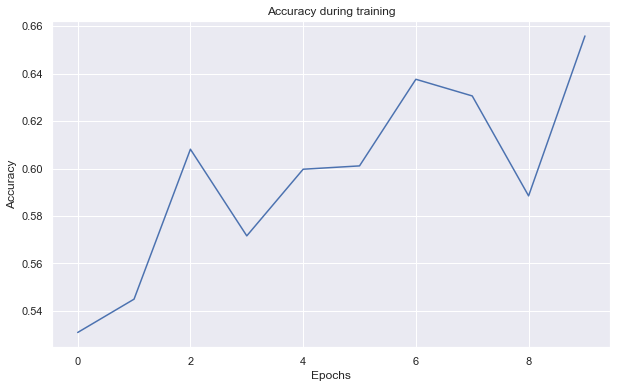

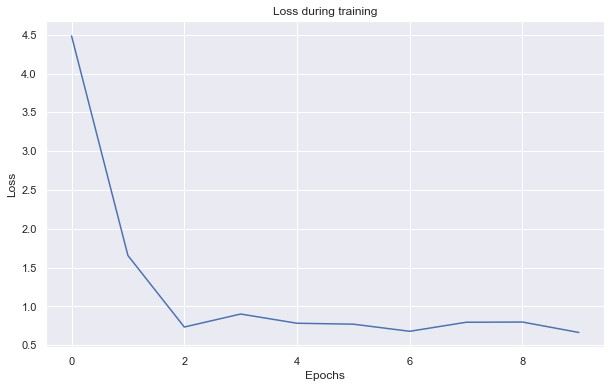

In [77]:
plot_history()

#### Results on test set

In [78]:
[test_loss, test_accuracy] = network.evaluate(X_test, y_test)
print(f'Evaluation results on test data:\n Loss= {test_loss}\n Accuracy= {test_accuracy}')

6/6 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.6872
Evaluation results on test data:
 Loss= 0.6142797470092773
 Accuracy= 0.6871508359909058


In [79]:
# 10 Epochs
#  Loss= 0.93621426820755
#  Accuracy= 0.7877094745635986

# 20 Epochs
# Loss= 0.9269315600395203
#  Accuracy= 0.7765362858772278

# 30 Epochs
#  Loss= 0.9777738451957703
#  Accuracy= 0.7094972133636475

# 500 Epochs
# Loss= 0.8873312473297119
# Accuracy= 0.7653631567955017

# 600 Epochs
# Loss= 0.794903576374054
#  Accuracy= 0.7094972133636475

# 1000 Epochs
#  Loss= 1.2661523818969727
#  Accuracy= 0.7150837779045105

### Summing up